In [1]:
import pandas as pd

In [2]:
house_sales_df = pd.read_csv("house_sales.csv",encoding='utf-8')

In [3]:
house_sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_sales_df['total_sqf'] = house_sales_df['sqft_above'] + house_sales_df['sqft_basement']

In [5]:
house_sales_df[['price','bedrooms','bathrooms','total_sqf','floors','sqft_lot','sqft_living15','sqft_lot15']]

,price,bedrooms,bathrooms,total_sqf,floors,sqft_lot,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,1.0,5650.0,1340,5650
1,538000.0,3.0,2.25,2570,2.0,7242.0,1690,7639
2,180000.0,2.0,1.00,770,1.0,10000.0,2720,8062
3,604000.0,4.0,3.00,1960,1.0,5000.0,1360,5000
4,510000.0,3.0,2.00,1680,1.0,8080.0,1800,7503
...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,3.0,1131.0,1530,1509
21609,400000.0,4.0,2.50,2310,2.0,5813.0,1830,7200
21610,402101.0,2.0,0.75,1020,2.0,1350.0,1020,2007
21611,400000.0,3.0,2.50,1600,2.0,2388.0,1410,1287


In [25]:
house_sales_df[house_sales_df['bedrooms'].isna()][['price','bedrooms','bathrooms','total_sqf','floors','sqft_lot']]

,price,bedrooms,bathrooms,total_sqf,floors,sqft_lot
18,189000.0,NaN,1.00,1200,1.0,9850.0
23,252700.0,NaN,1.50,1070,1.0,NaN
31,280000.0,NaN,1.50,1190,3.0,1265.0
32,687500.0,NaN,1.75,2330,1.5,5000.0
46,210490.0,NaN,1.00,990,1.0,8528.0
...,...,...,...,...,...,...
21498,610000.0,NaN,1.75,1630,3.0,1500.0
21505,1555000.0,NaN,3.50,4360,2.0,6240.0
21523,579950.0,NaN,2.75,2460,2.0,8643.0
21565,341780.0,NaN,2.75,2260,2.0,NaN


In [32]:
hs_bbb_df = house_sales_df[house_sales_df['bedrooms'].notnull()][['price','bedrooms','bathrooms','total_sqf', 'zipcode']]
hs_bbb_df

,price,bedrooms,bathrooms,total_sqf,zipcode
0,221900.0,3.0,1.00,1180,98178
1,538000.0,3.0,2.25,2570,98125
2,180000.0,2.0,1.00,770,98028
3,604000.0,4.0,3.00,1960,98136
4,510000.0,3.0,2.00,1680,98074
...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,98103
21609,400000.0,4.0,2.50,2310,98146
21610,402101.0,2.0,0.75,1020,98144
21611,400000.0,3.0,2.50,1600,98027


In [35]:
hs_bbb_df.corr(method='kendall')

,price,bedrooms,bathrooms,total_sqf,zipcode
price,1.000000,0.265942,0.370688,0.463475,-0.009424
bedrooms,0.265942,1.000000,0.440626,0.521796,-0.128799
bathrooms,0.370688,0.440626,1.000000,0.588825,-0.144641
total_sqf,0.463475,0.521796,0.588825,1.000000,-0.137603
zipcode,-0.009424,-0.128799,-0.144641,-0.137603,1.000000


In [7]:
import matplotlib.pyplot as plt

# stats module and missing data
- [missing data](https://www.statsmodels.org/devel/missing.html)

In [26]:
import numpy as np
import statsmodels.api as sm

# Bathrooms visavi Bedrooms

Text(0.5, 0, 'bedrooms')

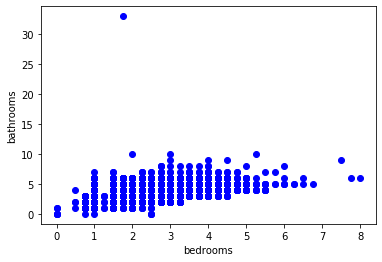

In [33]:
plt.scatter(hs_bbb_df.bathrooms,hs_bbb_df.bedrooms,color='blue',linewidth='1')
plt.ylabel('bathrooms')
plt.xlabel('bedrooms')

In [35]:
y = hs_bbb_df.bedrooms
X = hs_bbb_df.bathrooms
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     7057.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:39   Log-Likelihood:                -23236.
No. Observations:               19470   AIC:                         4.648e+04
Df Residuals:                   19468   BIC:                         4.649e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0519      0.017    122.616      0.0

# Square feet visavi Bedrooms

Text(0.5, 0, 'total sqf')

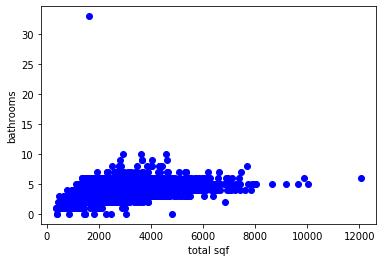

In [19]:
plt.scatter(hs_bbb_df.total_sqf,hs_bbb_df.bedrooms,color='blue')
plt.ylabel('bedrooms')
plt.xlabel('total sqf')

In [36]:
y = hs_bbb_df.bedrooms
X = hs_bbb_df.total_sqf
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                 1.022e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:28:25   Log-Likelihood:                -23442.
No. Observations:               20479   AIC:                         4.689e+04
Df Residuals:                   20477   BIC:                         4.690e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1571      0.013    164.075      0.0

/root/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Price visavi Bedrooms

Text(0.5, 0, 'total sqf')

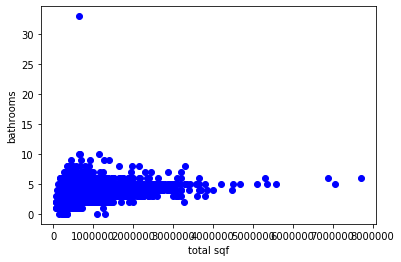

In [25]:
plt.scatter(hs_bbb_df.price,hs_bbb_df.bedrooms,color='blue')
plt.ylabel('bedrooms')
plt.xlabel('total sqf')

In [37]:
y = hs_bbb_df.bedrooms
X = hs_bbb_df.price
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2190.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:31:30   Log-Likelihood:                -26547.
No. Observations:               20479   AIC:                         5.310e+04
Df Residuals:                   20477   BIC:                         5.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9482      0.011    268.531      0.0

# Bathrooms plus total square feet visavi Bedrooms